In [2]:
!pip install pyarrow

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import pyarrow.orc as orc

filename = "./trades.orc"
df = pd.read_orc("./trades.orc")

# Data preparation:

### Tipos de columas

In [4]:
df.dtypes

trade_id     float64
price        float64
quantity     float64
time         float64
isSelling     object
dtype: object

### Conversión de formato de timestamp

In [5]:
df['Date'] = pd.to_datetime(df['time'], unit='ms')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute

### Encontrar valores NaN

In [6]:
df.shape
df[df.isna().any(axis=1)]

,trade_id,price,quantity,time,isSelling,Date,Year,Month,Hour,Minute
1337,NaN,NaN,NaN,NaN,None,NaT,NaN,NaN,NaN,NaN


In [7]:
#Eliminar la fila con valores NaN
df=df.dropna().reset_index(drop=True).copy()
df[df.isna().any(axis=1)]
df.shape

(902954, 10)

### Valores duplicados:

In [8]:
df.loc[df.duplicated()]
#Valores duplicados en subconjuntos
#df.loc[df.duplicated(subset="trade_id")]

,trade_id,price,quantity,time,isSelling,Date,Year,Month,Hour,Minute


In [9]:
#df.loc[df.duplicated(subset="time")]

### Valores inválidos para precio y cantidad:

In [10]:
#df["price"].value_counts().head(10)
#np.sort(df["price"].unique())
#print(df[df["price"]<0].index)
df
df=df[df["price"]>0].copy().reset_index(drop=True)
print(df[df["price"]<0])
#df2
#df2[df2["price"]<0]

Empty DataFrame
Columns: [trade_id, price, quantity, time, isSelling, Date, Year, Month, Hour, Minute]
Index: []


In [11]:
print("===================")
print(df[df["quantity"]<1])
#np.sort(df["quantity"].unique())

#len(df["price"].value_counts())

            trade_id    price  quantity          time isSelling  \
0       1.117733e+09  1793.61    0.0201  1.680221e+12     False   
1       1.117733e+09  1793.60    0.0197  1.680221e+12      True   
2       1.117733e+09  1793.61    0.0380  1.680221e+12     False   
3       1.117733e+09  1793.60    0.0222  1.680221e+12      True   
4       1.117733e+09  1793.61    0.0209  1.680221e+12     False   
...              ...      ...       ...           ...       ...   
902948  1.118635e+09  1821.51    0.0061  1.680307e+12      True   
902949  1.118635e+09  1821.51    0.0153  1.680307e+12      True   
902950  1.118635e+09  1821.51    0.0341  1.680307e+12      True   
902951  1.118635e+09  1821.51    0.0330  1.680307e+12      True   
902952  1.118635e+09  1821.52    0.0305  1.680307e+12     False   

                                Date    Year  Month  Hour  Minute  
0      2023-03-31 00:00:00.000999936  2023.0    3.0   0.0     0.0  
1      2023-03-31 00:00:00.000999936  2023.0    3.0   0.0  

# Feature understanding:

In [12]:
df["quantity"].value_counts().head(10)

0.0057    33470
0.0058    30144
0.0056    26602
0.0178    24556
0.0149    19740
0.0060    19231
0.0061    15105
0.0059    12319
1.0000    10832
0.0066     7839
Name: quantity, dtype: int64

In [13]:
df["isSelling"].value_counts()
print(df["isSelling"].value_counts())

False    469161
True     433792
Name: isSelling, dtype: int64


In [14]:
print(df["price"].value_counts())
print(df["price"].min())
print(df["price"].max())
print(df["price"].mean())
print(df["price"].std())

1830.00    2307
1825.00    1531
1820.00    1235
1800.00    1157
1840.00    1067
           ... 
1779.29       1
1780.24       1
1778.21       1
1780.94       1
1780.53       1
Name: price, Length: 6892, dtype: int64
1777.91
1847.28
1813.8099446695626
16.75872484523963


In [15]:
print(df["Hour"].value_counts())
print(df["Hour"].min())
print(df["Hour"].max())

13.0    100828
14.0     88988
15.0     56524
7.0      51052
12.0     48874
1.0      44023
8.0      37810
0.0      34941
20.0     34934
9.0      33782
16.0     32762
19.0     32462
11.0     32403
23.0     29453
5.0      27978
2.0      27405
21.0     26916
10.0     25804
3.0      24347
4.0      23839
17.0     23665
22.0     22035
6.0      21905
18.0     20223
Name: Hour, dtype: int64
0.0
23.0


<AxesSubplot:ylabel='Frequency'>

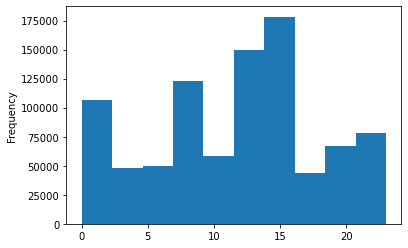

In [16]:
df["Hour"].plot(kind="hist")

(1777.91, 1847.28, -0.0017510260922835653, 0.03677154793795487)

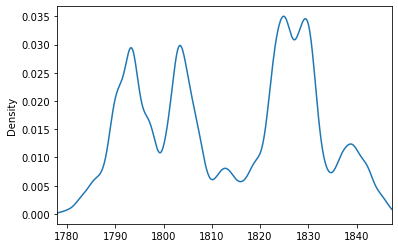

In [17]:
ax=df["price"].plot(kind="kde")

ax.axis(xmin=df["price"].min(),xmax=df["price"].max())
#plt.show()


(0.0001, 1042.1861, -0.017784914425269513, 0.3734832029306598)

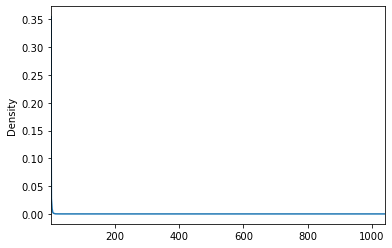

In [18]:
ax2=df["quantity"].plot(kind="kde")
ax2.axis(xmin=df["quantity"].min(),xmax=df["quantity"].max())


# Feature Relationships

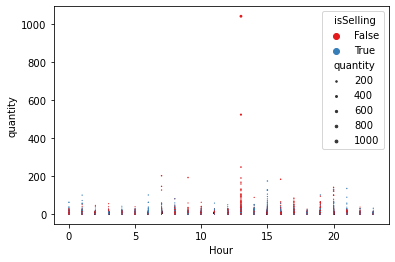

In [107]:
ax=sns.scatterplot(x="Hour", y="quantity",
                hue="isSelling", size="quantity",
                palette="Set1",
                sizes=(1, 8), linewidth=0,
                data=df)

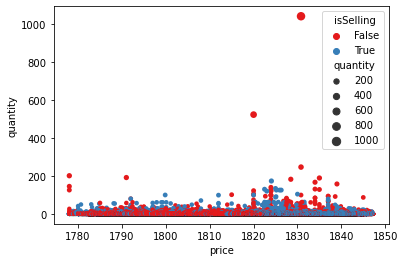

In [208]:
ax=sns.scatterplot(x="price", y="quantity",
                hue="isSelling", size="quantity",
                palette="Set1",
                #sizes=(1, 8),
                linewidth=0,
                data=df)

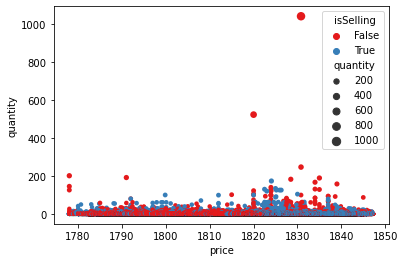

In [209]:
ax=sns.scatterplot(x="Hour", y="quantity",
                hue="isSelling", size="quantity",
                palette="Set1",
                #sizes=(1, 8), 
                linewidth=0,
                data=df)

/home/fernando/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


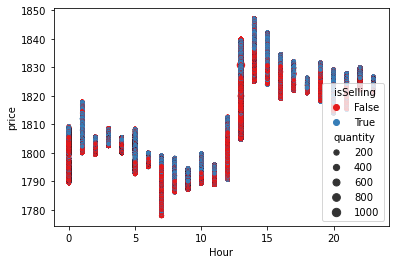

In [24]:
ax=sns.scatterplot(x="Hour", y="price",
                hue="isSelling", size="quantity",
                palette="Set1",
                #sizes=(1, 8), 
                linewidth=0,
                data=df)

/home/fernando/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


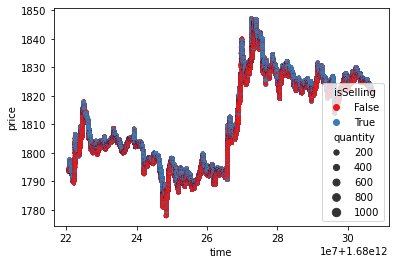

In [25]:
ax=sns.scatterplot(x="time", y="price",
                hue="isSelling", size="quantity",
                palette="Set1",
                #sizes=(1, 8), 
                linewidth=0,
                data=df)

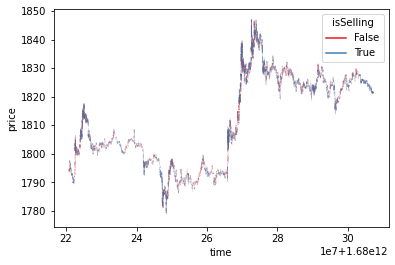

In [27]:
ax=sns.lineplot(x="time", y="price",
                hue="isSelling", 
                #size="quantity",
                palette="Set1",
                #sizes=(1, 8), 
                linewidth=0,
                data=df)

In [ ]:
ax=sns.pairplot(df,
                vars=["price","quantity","Hour","isSelling"],
                #x="price", y="quantity",
                hue="isSelling",
                #size="quantity",
                #palette="Set1",
                #sizes=(1, 8), 
                #linewidth=0,
                #data=df
               )

In [19]:
df[["price","quantity","Hour","isSelling"]].corr()

,price,quantity,Hour
price,1.000000,0.032928,0.625430
quantity,0.032928,1.000000,0.019598
Hour,0.625430,0.019598,1.000000


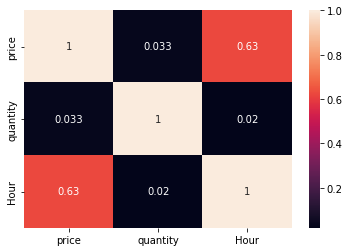

In [20]:
df_corr = df[["price","quantity","Hour","isSelling"]].corr()
ax=sns.heatmap(df_corr,annot=True)

# Ask a question about the data:

1. What was the bot's outcome for that day?


In [23]:

#Hay que seleccionar las ventas y compras.
df_buy = df[df["isSelling"]==False]
df_sell = df[df["isSelling"]==True]

df_buy["transaction_value"]=df_buy["price"]*df_buy["quantity"]
df_sell["transaction_value"]=df_sell["price"]*df_sell["quantity"]
total_buy_value=df_buy["transaction_value"].sum()
total_sell_value=df_sell["transaction_value"].sum()
bot_outcome=total_sell_value-total_buy_value
print(bot_outcome)
#Multiplicar el precio por la cantidad para encontrar el monto total de la transacción.

#Restar el monto de las compras del monto de las ventas. Ese es el outcome.

-43577653.14545226


<ipython-input-23-63672ebdb09c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_buy["transaction_value"]=df_buy["price"]*df_buy["quantity"]
<ipython-input-23-63672ebdb09c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell["transaction_value"]=df_sell["price"]*df_sell["quantity"]


2. How long was the longest chain of consecutive sells?

In [146]:

#print(df.head())
#print(df.tail())
print("========================================================")
col_name="isSelling"
df['consecutive'] = df[col_name].groupby((df[col_name] != df[col_name].shift()).cumsum()).transform('size')# * df.Col2
#print(df["consecutive"].max())
#print(df)

#print("========== Max False")
#max_false = df[df[col_name]==False]["consecutive"].max() 
#print(df[df[col_name]==False]["consecutive"].max())

print("========== Max True")
max_true = df[df[col_name]==True]["consecutive"].max() 
print(df[df[col_name]==True]["consecutive"].max())

print("========== Cadena más larga con valores False")
df2 = df[df[col_name]==True ].copy()
df2 = df2[df2["consecutive"]==max_true]
print(df2)

#print((df.isSelling == True).astype('int').cumsum().value_counts())
#print((df.isSelling == False).astype('int').cumsum().value_counts())
#print((df.isSelling.diff(True) != 0).astype('int').cumsum().value_counts())
#print((df.isSelling.diff(False) != 0).astype('int').cumsum().value_counts())


========== Max True
760
========== Cadena más larga con valores False
            trade_id    price  quantity          time isSelling  \
659727  1.118392e+09  1828.77    0.5470  1.680277e+12      True   
659728  1.118392e+09  1828.77    1.0000  1.680277e+12      True   
659729  1.118392e+09  1828.77    0.2155  1.680277e+12      True   
659730  1.118392e+09  1828.77    1.3797  1.680277e+12      True   
659731  1.118392e+09  1828.77    3.2651  1.680277e+12      True   
...              ...      ...       ...           ...       ...   
660482  1.118393e+09  1824.09    0.3289  1.680277e+12      True   
660483  1.118393e+09  1824.07    0.0274  1.680277e+12      True   
660484  1.118393e+09  1824.07    0.3000  1.680277e+12      True   
660485  1.118393e+09  1824.06    0.0199  1.680277e+12      True   
660486  1.118393e+09  1824.06  173.5232  1.680277e+12      True   

                                Date    Year  Month   Day  Hour  Minute  \
659727 2023-03-31 15:31:49.428999936  2023.0    3.

In [149]:
#3. What was the price difference between the first and the last operation of
#that chain?

print("---- First price in longest selling chain")
#print(df2.iloc[0,:])
print(df2.iloc[0,:]["price"])
print("---- Last price in longest selling chain")
#print(df2.iloc[-1,:])
print(df2.iloc[-1,:]["price"])


---- First price in longest selling chain
1828.77
---- Last price in longest selling chain
1824.06


In [156]:
print(np.sort(df["price"].unique()))

[-1.00000e+00  1.77791e+03  1.77793e+03 ...  1.84727e+03  1.84728e+03
          nan]
